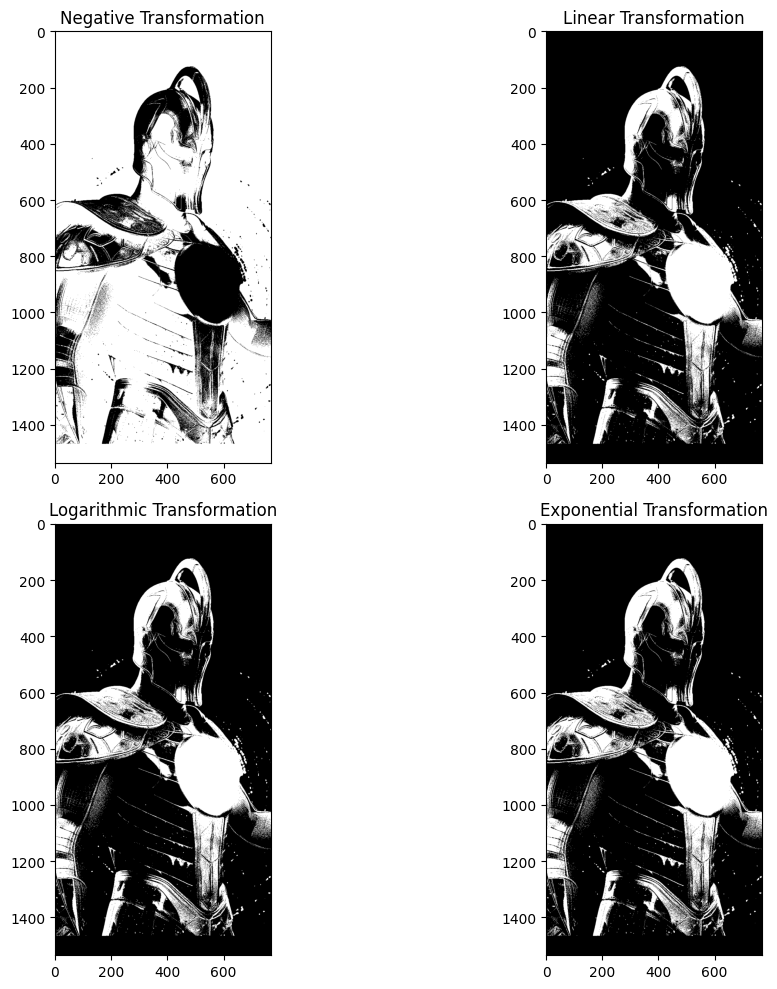

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
image_path = "./imagen_binarizada.png"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def negative_transformation(image):
    # Transformación negativa: 255 - pixel_value
    negative_image = 255 - image
    return negative_image

def linear_transformation(image, alpha, beta):
    # Transformación lineal: new_pixel_value = alpha * pixel_value + beta
    linear_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return linear_image

def logarithmic_transformation(image, c=1):
    # Transformación logarítmica: new_pixel_value = c * log(1 + pixel_value)
    logarithmic_image = c * np.log1p(image)
    
    # Escalar los valores a [0, 255]
    logarithmic_image = (logarithmic_image / np.max(logarithmic_image)) * 255
    
    # Convertir a tipo de datos CV_8U (8-bit unsigned integer)
    logarithmic_image = logarithmic_image.astype(np.uint8)
    
    return logarithmic_image

def exponential_transformation(image, c=1, gamma=1):
    # Transformación exponencial: new_pixel_value = c * (pixel_value ^ gamma)
    exponential_image = c * np.power(image, gamma)
    exponential_image = cv2.normalize(exponential_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    return exponential_image

# Aplicar las transformaciones a la imagen
negative_image = negative_transformation(gray_image)
linear_image = linear_transformation(gray_image, alpha=1.2, beta=10)
logarithmic_image = logarithmic_transformation(gray_image, c=30)
exponential_image = exponential_transformation(gray_image, c=0.005, gamma=1.5)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.imshow(negative_image, cmap='gray')
plt.title('Negative Transformation')

plt.subplot(222)
plt.imshow(linear_image, cmap='gray')
plt.title('Linear Transformation')

plt.subplot(223)
plt.imshow(logarithmic_image, cmap='gray')
plt.title('Logarithmic Transformation')

plt.subplot(224)
plt.imshow(exponential_image, cmap='gray')
plt.title('Exponential Transformation')

plt.tight_layout()
plt.show()
